# Analyzing Professional CS:GO
By Wil Gaboury and Calvin Hirsch

## Introduction

Anyone who’s been around the gaming community has definitely heard of Counter Strike Global Offensive (often abbreviated as CS:GO, and pronounced “C.S. go”). CS:GO is an immensely popular multiplayer first person shooter that was released in 2012, and has since become a staple of professional esports. The Counter Strike series of video games has actually been around for over two decades at this point, with it’s first title being a mod for the popular game Half-Life. As old as the game is, it is still one of the most popular PC games on the market and, according to steamcharts.com, is currently the number one game played on Steam.

The way it is played is fairly straightforward: there are two teams of 5 players, the terrorist and the counter-terrorist. Like most first person shooters, your character can freely run and jump around the map and also click on other players in order to shoot and kill them. The objective each round is for the terrorists to place a bomb at a specific location on the map while the counter terrorists attempt to stop them; if the time runs out before that happens the counter-terrorists win, but if at any point one team loses all its members, the other team immediately wins the round. In competitive play, a match consists of 30 rounds where after the 15th round the teams switch roles (counter-terrorists become terrorists and vise-versa). Depending on the event and importance of the face off (semi-finals, finals, etc.) the winner of a game between two teams is determined by best of one, three, or five matches.

One very important concept to understand, because it will be an important piece of data later on, is the in game economy. At the beginning of the game all players start off with pistols, the worst gun and the hardest to play with. At the end of each round players on both teams will earn money that can then be used to buy weapons (dying in a match means you have to buy new weapons next round otherwise you keep them). Winning a round will earn a team more money and winning consecutive rounds will give the winning team even more money. The total amount of money each team has and the ratio of money between the teams has a huge impact on game strategy.

The game is an exemplary competitive shooter. Professional players and teams usually live in houses together and practice many hours a day, much like a regular job. From personal experience I can tell you that being good at CS:GO requires training reflexes and muscle memory, learning strategies required for certain maps, and having good team dynamics. It is the exact opposite of Animal Crossing, the moment you stop paying attention you're out of the game.


## The Data

Source: https://www.kaggle.com/mateusdmachado/csgo-professional-matches/data

In this tutorial we will be looking at a dataset of professional CS:GO games found at the link above. Each entity in the table represents a single match with attributes about what date it was held, the teams who played, what map was played on, and various other matters about the match. One of the most important attributes that the data lists gives us is the total equipment value of each team at the beginning of a round, and who won each round of the match.

## Data Curation and Tidying
Start by importing the data frame library pandas along with numpy.

In [10]:
import pandas as pd
import numpy as np
import warnings

Next we are going to use the read_csv function to transform the csv into a data frame. There are 4 rows of bad data in the table that need to be removed, so we are going to select all the rows that are formatted correctly.

In [11]:
csgo_df = pd.read_csv('./data/csgo.csv')
csgo_df = csgo_df[pd.to_numeric(csgo_df.best_of, errors='coerce').notnull()]
csgo_df

/home/calvin/projects/cmsc320-final/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43229,2017-04-04,2309263,2683,FaZe,HellRaisers,1,Cache,t,ct,4250.0,...,2.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN
43230,2017-04-04,2309262,2683,Astralis,CLG,1,Train,t,ct,4250.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN
43231,2017-04-04,2309261,2683,SK,TYLOO,1,Mirage,ct,t,4350.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN
43232,2017-04-04,2309260,2683,Virtus.pro,MVP Project,1,Mirage,t,ct,4150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a few new attributes that are going to help us down the line. First we are going to create a win_ratio column which consists of the total wins in the match by the first team subtracted by the total win’s of the second team. The columns that track who wins each round are stored as a 1 or 2 depending on whether team one or team two won, but we are going to want to change these to true or false for ease of use later. Also just generally going to get rid of unneeded columns and rename some of them.

In [12]:
csgo_df['win_diff'] = csgo_df.loc[:, '1_winner':'30_winner'].apply(lambda x: len(x[x == 1]) - len(x[x == 2]), axis=1)
csgo_df.loc[:, '1_winner':'30_winner'] = csgo_df.loc[:, '1_winner':'30_winner'].applymap(lambda x: True if x == 1 else False if x == 2 else None)

csgo_df['t1_start_ct'] = csgo_df['t1_start'].apply(lambda x: x == 'ct')
csgo_df = csgo_df.drop(['t1_start', 't2_start'], axis=1)

csgo_df = csgo_df.rename(columns={'_map':'map'})

csgo_df[['t1_start_ct', '1_winner', '30_winner', 'map', 'win_diff']]

,t1_start_ct,1_winner,30_winner,map,win_diff
0,False,False,None,Nuke,-12
1,True,False,None,Dust2,-3
2,False,False,None,Mirage,-14
3,False,True,None,Dust2,11
4,True,False,None,Nuke,11
...,...,...,...,...,...
43229,False,False,None,Cache,-6
43230,False,False,None,Train,5
43231,True,False,None,Mirage,4
43232,False,False,None,Mirage,12


## Exploratory Data Analysis

We will be using the ggplot, standing for grammar of graphics plotting, library created by plotnine. It is based on the very popular R plotting library of the same name.

In [13]:
from plotnine import *

Some interesting data that we may want to look at is the win ratio of popular teams. While this seems easy given the way the data is structured calculating this requires a join operation. The team_1 and team_2 columns are conceptually an unordered pair, yet due to the nature of tabular data, they need to be in order. So the process starts by doing a groupby and counting the number of matches won by each team depending on what row they appear in while also totaling the number of matches played. Then where teams that have appeared in both columns have their wins and their total matches added together creating a table with the total wins and total matches played for any given team. Before sorting by win ratio, we want to filter out teams that have not played many matches because there may have been short lived teams that happened to have won most of the few matches they played.

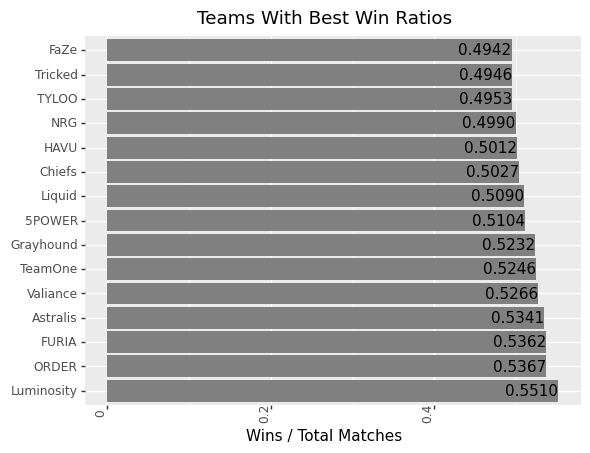

<ggplot: (8763028995365)>

In [14]:
team_wins_df = (pd.concat([
        (csgo_df.groupby('team_1')
            .agg(
                 total_wins_t1=pd.NamedAgg(column='win_diff', aggfunc=lambda x: len(list(filter(lambda e: e > 0, x)))),
                 total_matches_t1=pd.NamedAgg(column='team_1', aggfunc=len))
            ),
        (csgo_df.groupby('team_2')
            .agg(
                 total_wins_t2=pd.NamedAgg(column='win_diff', aggfunc=lambda x: len(list(filter(lambda e: e > 0, x)))),
                 total_matches_t2=pd.NamedAgg(column='team_2', aggfunc=len))
        )
    ],
    axis=1)
    .fillna(0))
team_wins_df['total_wins'] = team_wins_df.apply(lambda row: row.total_wins_t1 + row.total_wins_t2, axis=1)
team_wins_df['total_matches'] = team_wins_df.apply(lambda row: row.total_matches_t1 + row.total_matches_t2, axis=1)
team_wins_df['win_ratio'] = team_wins_df.apply(lambda row: row.total_wins / row.total_matches, axis=1)
team_wins_df = team_wins_df.drop(['total_wins_t1', 'total_matches_t1', 'total_wins_t2', 'total_matches_t2'], axis=1)
team_wins_df['team'] = team_wins_df.index

plot_df = team_wins_df[team_wins_df.total_matches > 400].sort_values(by='win_ratio', ascending=False).head(15)
plot_df = plot_df.assign(team_cat=pd.Categorical(plot_df['team'], ordered=True, categories=plot_df['team']))
plot_df['labels'] = plot_df['win_ratio'].map("{:.4f}".format)
(ggplot(plot_df,
    aes(y='win_ratio', x='team_cat')) +
        geom_bar(stat='identity', fill='grey') +
        theme(axis_text_x=element_text(angle=90,hjust=1,vjust=0.5)) +
        labs(title='Teams With Best Win Ratios',
            y='Wins / Total Matches',
            x='') +
        geom_text(aes(label='labels'), position=position_dodge(width=0.9), hjust='right') +
        coord_flip())

Another interesting thing to look at is map balance. The maps are meant to be as strategically balanced as possible but due to natural limitations of game design it is quite possible that maps generally favor the terrorist or counter-terrorist team. To look at this we are going to have a function count how many times the counter-terrorists win in a given match and find the ratio of counter terrorist wins divided by rounds played in the match. Looking at the distribution of this ratio will let us see whether the map skews toward counter-terrorists if the bulge is above 0.5 and it skews toward terrorists if the bulge is below 0.5.

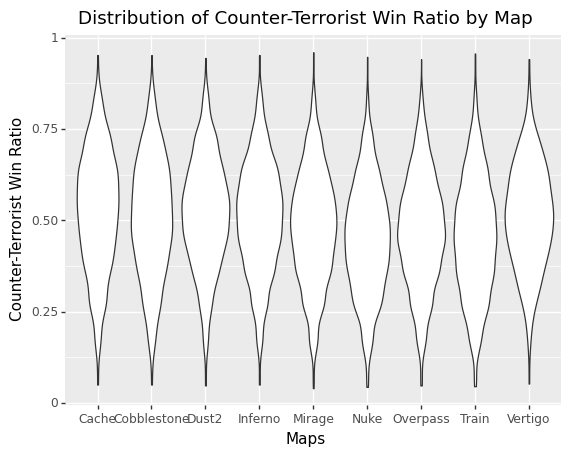

<ggplot: (8763039166233)>

In [15]:
map_df = csgo_df[csgo_df['map'] != 'Default']

def calc_ct_win_ratio(row):
    total = 15;
    ct_wins = 0;
    for i in range(1,16):
        if row["{}_winner".format(i)] == True:
            ct_wins = ct_wins + 1
    for i in range(16,31):
        if row["{}_winner".format(i)] == False:
            ct_wins = ct_wins + 1
        elif row["{}_winner".format(i)] == None:
            break;
        total = total + 1
        
    if not row['t1_start_ct']:
        return ct_wins / total
    else:
        return (total - ct_wins) / total

map_df = map_df.assign(ct_win_ratio=map_df.apply(calc_ct_win_ratio, axis=1))
(ggplot(map_df, aes(x='map', y='ct_win_ratio')) +
    geom_violin() +
    labs(title='Distribution of Counter-Terrorist Win Ratio by Map',
         x='Maps',
         y='Counter-Terrorist Win Ratio'))

## Hypothesis Testing

A nice library for hypothesis testing in python is the statsmodel library so we’ll import that.

In [16]:
import statsmodels.api as sm

After looking at the counter-terrorist win ratio the natural question to ask is: can we tell if there is a statistically significant skew toward the team playing terrorist or counter-terrorist? To investigate this we start with the null hypothesis which is that every map is neutral, so there should be an equal number of counter-terrorist wins and terrorist wins. We will use the z-test in order to test the hypothesis for each map. Looking at the data we can see that every map with the exception of Cobblestone is significantly skewed toward one of the sides since the p-value is <0.05 (but even Cobblestone has a very low p-value). Another important thing to note is that when doing a population mean test statistic we assume that the underlying distribution is normal. From visual inspection of the violin plot all the distributions seem normal but just for an added visual check I’ve created a histogram for the distribution for the Cache map, and as we can see, the distribution looks fairly normal.

In [17]:
map_ht_df = (map_df.groupby('map').agg(avg_ct_win_rat=pd.NamedAgg(column='ct_win_ratio', aggfunc=np.average)))
map_ht_df['map'] = map_ht_df.index
map_ht_df = (map_ht_df.assign(p_value=map_ht_df.apply(
                lambda row: sm.stats.ztest(map_df[map_df['map'] == row['map']]['ct_win_ratio'], value = 0.5, alternative='two-sided')[1], axis = 1)))
map_ht_df[['p_value', 'avg_ct_win_rat']]

,p_value,avg_ct_win_rat
map,,
Cache,1.881366e-23,0.526208
Cobblestone,5.527434e-02,0.506966
Dust2,1.080317e-12,0.517691
Inferno,4.680525e-07,0.508371
Mirage,1.120339e-30,0.481189
Nuke,2.563801e-99,0.449947
Overpass,1.109412e-46,0.470035
Train,9.932305e-111,0.454002
Vertigo,4.030249e-02,0.510993


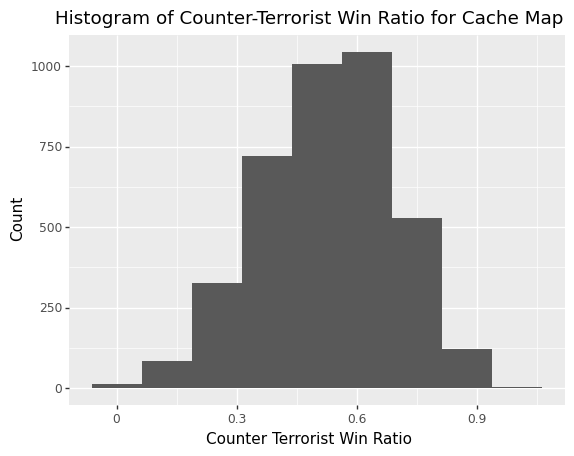

<ggplot: (8763039160989)>

In [18]:
(ggplot(map_df[map_df['map'] == 'Cache'], aes(x='ct_win_ratio')) +
    geom_histogram(binwidth=.125) +
    labs(title='Histogram of Counter-Terrorist Win Ratio for Cache Map',
        x='Counter Terrorist Win Ratio',
        y='Count'))

## Machine Learning

Next, we’re going to attempt to make a classifier that can predict which team will win a match after viewing the information from this dataset for only the first half (as a reminder, this includes the map, winner of each round, total economy value for each team each round, and which side each team played on). In order to do this, we will construct a simple linear neural network.

The first step in order to accomplish this is to prepare the data so that it’s in a format that the neural network can utilize. We’ll drop all the columns we don’t need for the classifier, including all the information for rounds 16-30 (as we’re only looking at the first half). Then, we’ll construct a list of the most common maps and remove all datapoints that are on other maps.

In [19]:
maps = ["Nuke", "Dust2", "Mirage", "Train", "Cache", "Cobblestone", "Vertigo", "Inferno", "Overpass"]

classifier_df = csgo_df.copy()
classifier_df = classifier_df.drop(['event_id', 'match_id', 'date', 'best_of', 'team_1', 'team_2'], axis=1)
classifier_df = classifier_df.drop(classifier_df.loc[:, '16_winner': '30_winner'].columns, axis=1)
classifier_df = classifier_df.drop(classifier_df.loc[:, '16_t1': '30_t1'].columns, axis=1)
classifier_df = classifier_df.drop(classifier_df.loc[:, '16_t2': '30_t2'].columns, axis=1)
classifier_df = classifier_df.query("map in list(" + str(maps) + ")")
classifier_df = classifier_df.sample(frac=1).reset_index(drop=True)

classifier_df

,map,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,...,8_winner,9_winner,10_winner,11_winner,12_winner,13_winner,14_winner,15_winner,win_diff,t1_start_ct
0,Mirage,4300.0,18050.0,20850.0,22900.0,27650.0,28350.0,26050.0,29300.0,26250.0,...,False,True,False,True,True,True,False,True,2,False
1,Inferno,4350.0,12000.0,10150.0,2300.0,24300.0,15350.0,9000.0,26350.0,28200.0,...,True,False,False,False,False,True,False,False,-13,False
2,Overpass,3950.0,3500.0,20600.0,19750.0,26350.0,4800.0,20250.0,4350.0,23450.0,...,False,False,False,False,False,True,False,False,-13,False
3,Mirage,3450.0,4150.0,24150.0,23450.0,24800.0,24600.0,24300.0,19200.0,22100.0,...,True,True,False,True,True,True,True,True,13,False
4,Mirage,4300.0,22600.0,26900.0,27800.0,28350.0,26650.0,28550.0,2650.0,22250.0,...,False,True,True,True,False,True,False,True,-2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43034,Inferno,4200.0,19950.0,19550.0,26600.0,30550.0,20600.0,19300.0,28700.0,17550.0,...,False,False,False,False,False,False,False,True,3,True
43035,Mirage,4050.0,17650.0,20550.0,22550.0,25850.0,25150.0,1000.0,23700.0,24350.0,...,True,False,False,True,False,False,True,False,-7,False
43036,Cache,4000.0,1300.0,21700.0,3100.0,23300.0,22850.0,22900.0,10450.0,24700.0,...,True,True,True,True,True,False,False,False,-7,False
43037,Inferno,4250.0,19050.0,20050.0,23600.0,24000.0,24000.0,24000.0,24000.0,23600.0,...,False,False,False,False,False,True,True,False,0,False


We’ll make the classifier attempt to guess the win difference (win_diff) rather than the winner in order to train it most effectively. This helps because if our guess is very far off, gradient descent will change the network more drastically than if our guess is close but still wrong. Also, we can get insight into how far off our guesses are rather than just right or wrong. In order to do this, we will take win_diff out of our dataframe and save it in a separate one to serve as the labels that we will compare our classifier output to.

In [20]:
label_df = classifier_df["win_diff"]
classifier_df = classifier_df.drop(["win_diff"], axis=1)

label_df

0         2
1       -13
2       -13
3        13
4        -2
         ..
43034     3
43035    -7
43036    -7
43037     0
43038    -7
Name: win_diff, Length: 43039, dtype: int64

The next step is to figure out what to do with the map column. We can’t really input this categorical variable directly into the network, so we need a way to modify it. One approach that we’re going to use is a one-hot encoding. This means that we have a column for each possible map and for each match we set its map to true and all the others to false (the boolean variables will be inputted to the network as 0 or 1). This allows the network to take the map into account, so if the map is skewed towards terrorists or counter-terrorists, the network is able to take this into account. Another change we need to make is to reduce the magnitude of the economy numbers. They often reach up to above \\$20,000, and the problem with this in linear neural networks is that they will overshadow all the other inputs. To fix this simply, we can just divide all the economy inputs by 10,000, which will make low economies (e.g. \\$5000) less than 1 with large economies (e.g. \\$25,000) being about 2.5. This is reasonably within the scale of the boolean inputs, which are 0 or 1.

In [21]:
for ind in range(0, len(classifier_df)):
    for map in maps:
        classifier_df.at[ind, "is" + map] = classifier_df.at[ind, "map"] == map

del classifier_df["map"]
        
for i in range(1, 16):
    classifier_df["{}_t1".format(i)] = classifier_df["{}_t1".format(i)].apply(lambda x: x / 10000)
    classifier_df["{}_t2".format(i)] = classifier_df["{}_t2".format(i)].apply(lambda x: x / 10000)

classifier_df.head(10)

,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,...,t1_start_ct,isNuke,isDust2,isMirage,isTrain,isCache,isCobblestone,isVertigo,isInferno,isOverpass
0,0.430,1.805,2.085,2.290,2.765,2.835,2.605,2.930,2.625,2.555,...,False,False,False,True,False,False,False,False,False,False
1,0.435,1.200,1.015,0.230,2.430,1.535,0.900,2.635,2.820,0.770,...,False,False,False,False,False,False,False,False,True,False
2,0.395,0.350,2.060,1.975,2.635,0.480,2.025,0.435,2.345,0.735,...,False,False,False,False,False,False,False,False,False,True
3,0.345,0.415,2.415,2.345,2.480,2.460,2.430,1.920,2.210,2.400,...,False,False,False,True,False,False,False,False,False,False
4,0.430,2.260,2.690,2.780,2.835,2.665,2.855,0.265,2.225,2.340,...,True,False,False,True,False,False,False,False,False,False
5,0.430,1.860,2.090,2.420,2.540,2.260,2.420,2.150,2.565,2.400,...,False,False,False,True,False,False,False,False,False,False
6,0.425,1.080,0.110,2.580,2.825,2.760,2.900,2.260,1.510,2.755,...,True,False,False,False,False,False,False,True,False,False
7,0.420,1.920,1.810,2.535,2.500,2.745,2.715,2.725,2.735,2.715,...,False,False,False,False,False,True,False,False,False,False
8,0.425,1.775,2.275,2.480,1.935,2.045,2.450,2.705,2.395,2.335,...,False,False,False,False,False,False,False,False,True,False
9,0.425,1.955,2.565,2.455,2.530,1.785,0.800,2.430,0.420,2.810,...,True,False,False,False,True,False,False,False,False,False


Now, we’ll make the network structure. For our machine learning, we’ll be using pytorch, a popular library for machine learning that makes the scripting about as simple as it can be. We won’t be going into too much detail about the methodology and reasoning behind the machine learning as it is a little beyond the scope of this tutorial, but there are lots of good resources out there for learning about neural networks, loss functions, and gradient descent if you want to learn how this is working in greater detail. In addition, pytorch has many useful tutorials on constructing models using their library. After expanding the map column and removing all unnecessary columns, we have 55 inputs. This means our input layer has 55 nodes. Because this task is relatively simple, we will create a small linear network, and we’ll use the rectified linear unit (ReLU) activation function for all layers. We’ll have two hidden layers with 20 and 5 nodes, and our one output node will be our classifier’s prediction of the final win difference.

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.l1 = nn.Linear(55, 20)
        self.l2 = nn.Linear(20, 5)
        self.l3 = nn.Linear(5, 1)
        
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

Next, we have to initialize the network and set up the loss function (we’ll be using binary cross entropy loss) and the optimizer (stochastic gradient descent).


In [32]:
import torch.optim as optim

c = Classifier()

criterion = nn.BCELoss()
optimizer = optim.SGD(c.parameters(), lr=0.001, momentum=0.9)

Now, we have to construct our training and test data sets as well as their respective pytorch data loaders. First, we’ll split the classifier dataframe and the labels into training and test sets. As the names suggest, we will train our model on the training set and test it on the test set so that the model doesn’t see the test data beforehand ensuring a fair test. Then, we will convert them into pytorch tensors, then tensor datasets, and then put them into two dataloaders (train and test).


In [33]:
import torch.utils.data as data_utils

batch_size = 32
test_size = 2000

train_df = classifier_df.head(-test_size)
train_labels_df = label_df.head(-test_size)
test_df = classifier_df.tail(test_size)
test_labels_df = label_df.tail(test_size)

train_features = torch.tensor(train_df.values.astype(np.float32))
train_labels = torch.tensor(train_labels_df.values.astype(np.float32)).unsqueeze(-1)
train_set = data_utils.TensorDataset(train_features, train_labels)

test_features = torch.tensor(test_df.values.astype(np.float32))
test_labels = torch.tensor(test_labels_df.values.astype(np.float32)).unsqueeze(-1)
test_set = data_utils.TensorDataset(test_features, test_labels)

train_dl = data_utils.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_dl = data_utils.DataLoader(test_set, batch_size=batch_size, shuffle=True)
len(train_set)

41039

It is now time to train the model. We’ll train for 50 epochs, meaning we will train over the whole dataset 50 times. The body of the training loop will proceed as follows: run the inputs through the network, normalize the output and label so that they are between 0 and 1, pass them into the loss function, and step the optimizer to perform the backward pass of gradient descent. We will also keep track of loss and accuracy and print them at intervals throughout training.


In [34]:
print_interval = 5
batches_per_epoch = 41039.0 / batch_size

for epoch in range(50):
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_dl, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = c(inputs)
            
        loss = criterion(outputs.clamp(-16, 16) / 32 + 0.5, labels / 32 + 0.5)
        loss.backward()
        optimizer.step()
                
        running_acc += np.mean(np.sign(outputs.detach().numpy()) == np.sign(labels.detach().numpy()))
        running_loss += loss.item()
        
    if epoch % print_interval == 0:
        print("%d - loss: %.3f, %.2f%% acc" %
              (epoch, running_loss / batches_per_epoch, 100 * running_acc / batches_per_epoch))
        running_loss = 0.0

print('Finished Training')

0 - loss: 0.691, 51.11% acc
5 - loss: 0.624, 72.23% acc
10 - loss: 0.619, 73.03% acc
15 - loss: 0.617, 73.46% acc
20 - loss: 0.616, 73.56% acc
25 - loss: 0.616, 73.65% acc
30 - loss: 0.615, 73.69% acc
35 - loss: 0.615, 73.73% acc
40 - loss: 0.615, 73.66% acc
45 - loss: 0.615, 73.73% acc
Finished Training


Finally, it’s time to test the classifier. We’ll enumerate through the test data loader as we did with the training data loader and run each input through the classifier. Then, we’ll keep track of the number of correct predictions as well as the distance from the correct win difference for each prediction and print them at the end.


In [36]:
correct = 0
dist = 0

for i,data in enumerate(test_dl, 0):
    inputs, labels = data
    
    outputs = c(inputs)
    
    correct += np.sum(np.sign(outputs.detach().numpy()) == np.sign(labels.detach().numpy()))
    dist += np.sum(np.abs(labels.detach().numpy() - outputs.detach().numpy()))

print("Winner Accuracy: {}%".format(100 * correct / test_size))
print("Average Distance: {}".format(dist / test_size))

Winner Accuracy: 75.1%
Average Distance: 3.665345142364502


If you were able to run this successfully, you should get about 75% winner accuracy and 3.5 average distance. This is pretty good, as it means we are correctly guessing the outcome three quarters of the time and we are only off by 3.5 rounds on average. However, because there are plenty of matches that have clear winners in the first half and are trivial to predict the winner of. Our classifier isn’t nearly as good as it could be if we included historical data like player statistics and team statistics leading up to the match. The dataset we used has other data similar to this, but we will leave it up to the reader to try and incorporate this data.

Now, we've successfully curated the CS:GO professional match dataset for all our purposes, done meaningful exploratory data analysis on team performance, and followed this up with hypothesis testing to better understand map skew; finally, we used machine learning to expand look into match prediction. Hopefully you've gleaned some useful information from this tutorial, and we encourage the readers to make modifications in order to accomplish their own analysis goals.